In [2]:
import pandas as pd
import uproot
#import uproot3
import numpy as np
# import track_time_calibration as ttc
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, r'C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\tracking')
import track_reconstruction as tr
# def merger(Array_of_paths):
#     br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp']#, 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value', 'timestamp_cal_chi2', 'timestamp_cal_dof', 'value_cal_chi2', 'value_cal_dof', 'value_saturation']   
#     df_general = pd.DataFrame(columns = br_list_data)
#     for element in Array_of_paths:
#         Tname = 'board_57'
#         # Extract the data and transform it into a dataframe
#         with uproot.open(element) as tree:
#             dict_ecal = tree[Tname].arrays(br_list_data, library="np")
#         ## REALLY IMPORTANT, THE TIME CALIBRATION MUST BE DONE USIGN THE SAME DATAFRAME AS THE ONE USED TO RECONSTRUCT THE TRACK

#         df = pd.DataFrame.from_dict(dict_ecal).query('n_hits>6')
#         df['path_id'] = element
#         df=df.query('n_hits<18')
#         #print(df)
#         df_general=df_general.append(df)
#     print(df_general)
#     return df_general
## THUS FAR WE HAVE OPENED AND CREATED A GENERIC DATAFRAME ##





In [3]:
file_path = '/Users/dariaberezovska/!TP4a/test_tracking/10h/data_0000.root' ## later, one can use concatenation of data_0001.root - data_0008.root files as well. One is enough for testing

hits_tree = 'board_57'
evt_tree = 'event'
# br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp']#, 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value', 'timestamp_cal_chi2', 'timestamp_cal_dof', 'value_cal_chi2', 'value_cal_dof', 'value_saturation']
br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp', 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value']
br_list_evt = ['timestamp', 'evt_number', 'flags']
with uproot.open(file_path) as tree:
    hits_dict = tree[hits_tree].arrays(br_list_data, library="np")
    evts_dict = tree[evt_tree].arrays(br_list_evt, library="np")
    
# df_hits = pd.DataFrame.from_dict(hits_dict).query('n_hits > 3')
df_hits = pd.DataFrame.from_dict(hits_dict)
df_evts = pd.DataFrame.from_dict(evts_dict)




FileNotFoundError: file not found

    '/Users/dariaberezovska/!TP4a/test_tracking/10h/data_0000.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


In [ ]:
df_hits['timestamp_global'] = df_evts['timestamp']
df_hits.query('n_hits > 2', inplace=True)

In [ ]:
df_hits

,n_hits,tofpet_id,tofpet_channel,timestamp,t_coarse,t_fine,v_coarse,v_fine,value,timestamp_global
18,21,"[1, 4, 4, 0, 4, 2, 1, 2, 3, 0, 6, 6, 5, 7, 6, ...","[56, 20, 12, 51, 52, 56, 48, 36, 56, 23, 3, 47...","[0.36406112, 0.3387759, 0.22964606, 0.35876107...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[285, 301, 317, 304, 269, 279, 293, 253, 257, ...","[40, 48, 48, 40, 46, 40, 40, 44, 38, 32, 36, 4...","[57, 45, 49, 51, 47, 47, 56, 49, 49, 51, 48, 4...","[-0.3135891, -0.82231325, 0.24428469, -0.42816...",61420341
41,12,"[1, 3, 6, 4, 6, 4, 3, 5, 7, 4, 6, 1]","[38, 38, 26, 54, 46, 8, 58, 44, 46, 38, 2, 34]","[0.46687505, 0.30044308, 0.13078116, 0.3160458...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]","[260, 306, 316, 299, 308, 311, 223, 347, 309, ...","[36, 38, 36, 46, 38, 42, 36, 38, 40, 48, 36, 38]","[56, 64, 56, 55, 44, 56, 47, 62, 49, 49, 50, 58]","[-0.8448553, 1.4276503, 1.8902504, 0.35085836,...",67132904
60,9,"[4, 3, 4, 5, 6, 7, 6, 1, 6]","[6, 33, 46, 50, 41, 41, 21, 34, 1]","[0.5811783, 0.8478426, 0.85727125, 0.4066967, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1]","[260, 238, 203, 292, 208, 236, 236, 250, 308]","[48, 40, 46, 36, 38, 44, 38, 38, 32]","[46, 57, 49, 52, 46, 43, 44, 55, 42]","[-1.249579, -0.5120435, -1.8308084, 1.0668914,...",73883794
100,3,"[0, 0, 0]","[56, 52, 60]","[0.8623718, 1.598726, 1.7553612]","[0, 1, 1]","[210, 233, 226]","[36, 38, 34]","[65, 48, 47]","[9.146994, -0.6701174, -0.7815415]",86093559
105,16,"[6, 1, 7, 6, 4, 3, 1, 4, 4, 7, 4, 5, 7, 7, 6, 5]","[23, 35, 35, 32, 27, 48, 52, 31, 43, 51, 42, 4...","[0.98513347, 0.8066452, 1.1262498, 1.1203352, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[181, 217, 311, 319, 286, 310, 349, 351, 306, ...","[36, 52, 38, 36, 48, 38, 48, 42, 48, 44, 44, 3...","[38, 64, 46, 50, 48, 50, 52, 54, 47, 49, 45, 5...","[-1.4876015, 1.7744374, 1.0992572, 0.35562634,...",87734096
...,...,...,...,...,...,...,...,...,...,...
999954,3,"[5, 7, 7]","[55, 37, 57]","[0.34058174, 0.7885307, 1.2826744]","[0, 0, 1]","[279, 206, 289]","[42, 44, 38]","[51, 44, 47]","[-0.9956317, -0.22211297, -2.7059336]",324855889673
999962,8,"[0, 0, 2, 1, 2, 1, 0, 3]","[1, 61, 53, 61, 25, 33, 29, 61]","[0.8390209, 0.6392428, 0.8770397, 0.5867053, 0...","[0, 0, 0, 0, 0, 0, 0, 1]","[219, 240, 216, 269, 230, 334, 333, 345]","[34, 38, 36, 38, 42, 38, 36, 32]","[47, 52, 54, 51, 45, 64, 49, 51]","[-1.827809, -0.43205178, 0.5614116, -1.0076048...",324858448575
999974,18,"[1, 6, 0, 6, 7, 4, 2, 4, 5, 2, 7, 4, 4, 0, 3, ...","[50, 51, 50, 23, 35, 38, 63, 58, 32, 7, 59, 34...","[0.5743023, 0.9818414, 0.78290564, 0.48880604,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[252, 175, 210, 261, 188, 307, 203, 263, 293, ...","[44, 36, 42, 36, 38, 48, 34, 40, 44, 36, 38, 4...","[44, 41, 46, 44, 39, 51, 52, 51, 52, 57, 45, 4...","[-1.494916, -2.2778494, -1.3322823, 1.0383793,...",324862521505
999978,18,"[3, 0, 1, 1, 2, 7, 6, 2, 5, 4, 6, 6, 4, 5, 0, ...","[46, 55, 35, 63, 26, 50, 10, 2, 44, 36, 30, 54...","[0.52234226, 0.58917886, 0.40165895, 0.5720964...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[270, 256, 281, 252, 251, 310, 270, 223, 296, ...","[42, 38, 52, 42, 42, 38, 38, 40, 38, 40, 34, 3...","[44, 52, 65, 59, 48, 50, 46, 55, 58, 48, 41, 4...","[-1.382923, -0.6078804, 1.9445635, 0.94823724,...",324864186911


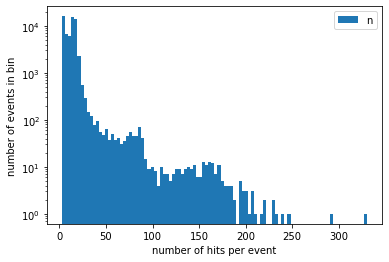

In [ ]:
# basic histogram
hits_table=df_hits['n_hits'].to_numpy()
hits_table_cut=hits_table[hits_table>2]
plt.hist(hits_table_cut,bins = 100,log = True)
plt.xlabel('number of hits per event')
plt.ylabel('number of events in bin')
plt.legend('n')